In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [3]:
df_da_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()


In [4]:
df_da_US = df_da_US.dropna(subset = "salary_year_avg")
df_da_exploed = df_da_US.explode("job_skills")

In [5]:
df_da_skills=df_da_exploed.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending= False)

df_da_skills = df_da_skills.rename(columns={"count":"skill_count","median": "median_salary"})
da_us_count =len(df_da_US)

df_da_skills["skill_percent"] = df_da_skills["skill_count"] / da_us_count * 100

percent_to_see = 5

df_da_skills_highdemand = df_da_skills[df_da_skills["skill_percent"] > percent_to_see]

df_da_skills_highdemand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


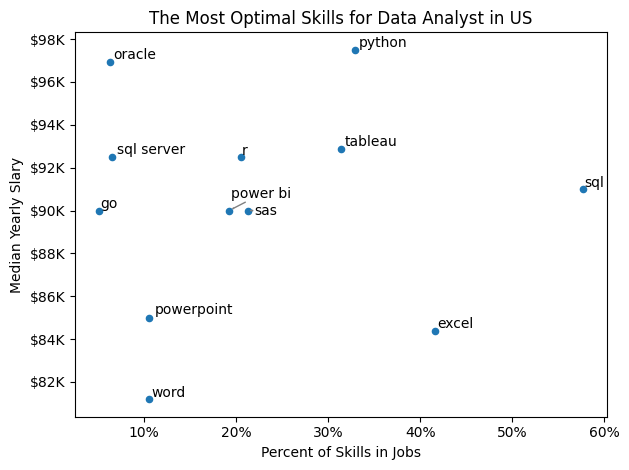

In [6]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter


df_da_skills_highdemand.plot(kind ="scatter" ,x ="skill_percent",y= "median_salary")

texts =[]
for i,text in enumerate(df_da_skills_highdemand.index):
   
    texts.append(plt.text(df_da_skills_highdemand["skill_percent"].iloc[i],df_da_skills_highdemand["median_salary"].iloc[i],text))

adjust_text(texts,arrowprops =dict(arrowstyle = "->",color ="gray",lw= 1))   

ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))

plt.xlabel("Percent of Skills in Jobs")
plt.ylabel("Median Yearly Slary")
plt.title("The Most Optimal Skills for Data Analyst in US")
plt.tight_layout()
plt.show()

In [7]:
df_technology = df["job_type_skills"].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

tech_dict = {}



In [8]:
for row in df_technology:
    temp_dict = ast.literal_eval(row)
    for key,value in temp_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value



In [9]:
for key,value in tech_dict.items():
    tech_dict[key] = list(set(value))

In [10]:
print(len(tech_dict))
for key in tech_dict.keys():
    print(key)
    print(tech_dict[key])

10
analyst_tools
['spreadsheet', 'word', 'ms access', 'powerbi', 'ssis', 'ssrs', 'powerpoint', 'dax', 'alteryx', 'tableau', 'excel', 'microstrategy', 'spss', 'esquisse', 'looker', 'nuix', 'sheets', 'sharepoint', 'power bi', 'visio', 'qlik', 'sap', 'cognos', 'outlook', 'msaccess', 'sas', 'datarobot', 'splunk']
programming
['c++', 'c', 'kotlin', 'cobol', 'typescript', 'no-sql', 'java', 'c#', 'mongo', 'powershell', 'julia', 'f#', 't-sql', 'solidity', 'clojure', 'ruby', 'vb.net', 'groovy', 'bash', 'elixir', 'shell', 'python', 'lua', 'assembly', 'golang', 'ocaml', 'swift', 'matlab', 'nosql', 'scala', 'pascal', 'crystal', 'visual basic', 'fortran', 'rust', 'mongodb', 'erlang', 'javascript', 'objective-c', 'visualbasic', 'lisp', 'vba', 'html', 'sql', 'sass', 'sas', 'go', 'perl', 'php', 'css', 'delphi', 'r', 'haskell', 'apl', 'dart']
cloud
['linode', 'ovh', 'oracle', 'databricks', 'bigquery', 'aurora', 'firebase', 'heroku', 'azure', 'redshift', 'ibm cloud', 'colocation', 'aws', 'digitalocean',

In [11]:
tech_df = pd.DataFrame(list(tech_dict.items()),columns=["technology","skills"])

In [12]:
tech_df

,technology,skills
0,analyst_tools,"[spreadsheet, word, ms access, powerbi, ssis, ..."
1,programming,"[c++, c, kotlin, cobol, typescript, no-sql, ja..."
2,cloud,"[linode, ovh, oracle, databricks, bigquery, au..."
3,libraries,"[graphql, dplyr, seaborn, gdpr, nltk, electron..."
4,other,"[npm, puppet, atlassian, bitbucket, unreal, te..."
5,databases,"[db2, dynamodb, postgresql, neo4j, elasticsear..."
6,os,"[macos, suse, wsl, arch, linux, windows, redha..."
7,async,"[trello, wrike, monday.com, notion, confluence..."
8,webframeworks,"[asp.netcore, rubyon rails, laravel, ember.js,..."
9,sync,"[ringcentral, webex, wire, google chat, matter..."


In [13]:
tech_df = tech_df.explode("skills")

In [14]:
df_plot = df_da_skills_highdemand.merge(tech_df,left_on="job_skills",right_on= "skills")

4 [ 0.03405312 -0.62882182]
5 [-0.57703697 -0.34411207]


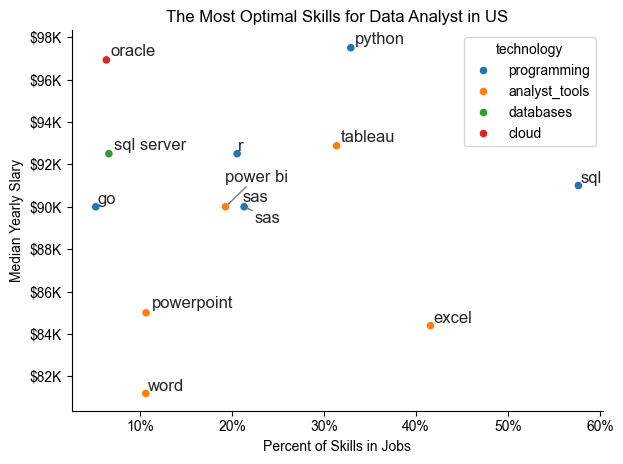

In [17]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter


#df_plot.plot(kind ="scatter" ,x ="skill_percent",y= "median_salary")
sns.scatterplot(data=df_plot,x= "skill_percent",y ="median_salary"
                ,hue="technology")

sns.despine()
sns.set_theme(style="ticks")

texts =[]
for i,text in enumerate(df_plot["skills"]):
   
    texts.append(plt.text(df_plot["skill_percent"].iloc[i],df_plot["median_salary"].iloc[i],text))

adjust_text(texts,arrowprops =dict(arrowstyle = "->",color ="gray",lw= 1))   

ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))

plt.xlabel("Percent of Skills in Jobs")
plt.ylabel("Median Yearly Slary")
plt.title("The Most Optimal Skills for Data Analyst in US")
plt.tight_layout()
plt.show()